# Historic Conservation Areas and Urban Heat

## Loading Libraries

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#other libraries will be added later on as needed, but these are the foundational ones for this data analysis

## Data Cleaning and Wrangling

In [5]:
#opening the Conservation Area geodataframe for the whole of the UK
consareas = gpd.read_file('conservation-area.geojson')

In [6]:
consareas.head()

dataset end-date    entity entry-date              name  \
0  conservation-area           44000001 2004-06-01          Napsbury   
1  conservation-area           44000002 2004-06-01     Shafford Mill   
2  conservation-area           44000003 2004-06-01    Potters Crouch   
3  conservation-area           44000004 2004-06-01  Old Bricket Wood   
4  conservation-area           44000005 2004-06-01        Sleapshyde   

  organisation-entity             prefix reference  start-date   typology  \
0                 278  conservation-area      CA18  1996-04-01  geography   
1                 278  conservation-area      CA10  1980-07-31  geography   
2                 278  conservation-area      CA12  1977-07-27  geography   
3                 278  conservation-area      CA13  1983-07-20  geography   
4                 278  conservation-area      CA16  1993-03-31  geography   

                                   documentation-url document-url  \
0  https://stalbans.gov.uk/sites/default/files/do...         None   
1  https://stalbans.gov.uk/sites/default/files/do...         None   
2  https://stalbans.gov.uk/sites/default/files/do...         None   
3  https://stalbans.gov.uk/sites/default/files/do...         None   
4  https://www.stalbans.gov.uk/sites/default/file...         None   

  designation-date legislation notes  \
0       1996-01-04        None  None   
1       1980-07-31        None  None   
2       1977-07-27        None  None   
3       1983-07-20        None  None   
4       1993-03-31        None  None   

                                            geometry  
0  POLYGON ((-0.30772 51.72496, -0.30783 51.72504...  
1  POLYGON ((-0.37242 51.77434, -0.37253 51.77414...  
2  POLYGON ((-0.38518 51.7335, -0.38516 51.73356,...  
3  POLYGON ((-0.37363 51.6902, -0.37356 51.69005,...  
4  POLYGON ((-0.25959 51.74626, -0.25721 51.7472,...

In [7]:
consareas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dataset              8999 non-null   object        
 1   end-date             8999 non-null   object        
 2   entity               8999 non-null   object        
 3   entry-date           8999 non-null   datetime64[ms]
 4   name                 8999 non-null   object        
 5   organisation-entity  8999 non-null   object        
 6   prefix               8999 non-null   object        
 7   reference            8999 non-null   object        
 8   start-date           8999 non-null   object        
 9   typology             8999 non-null   object        
 10  documentation-url    6221 non-null   object        
 11  document-url         4104 non-null   object        
 12  designation-date     7097 non-null   datetime64[ms]
 13  legislation          103 

In [8]:
#this is the study area for my research
lonboroughs = gpd.read_file('London_Boroughs.gpkg')

<Axes: >

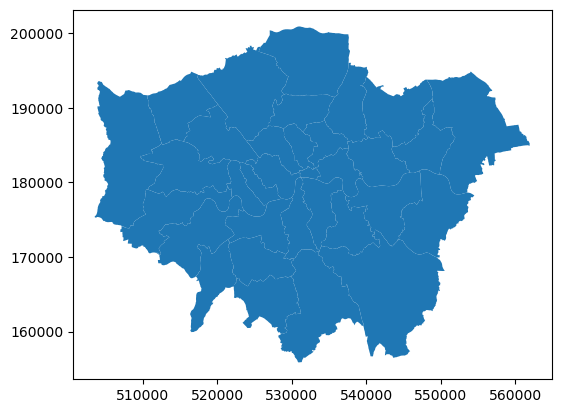

In [9]:
lonboroughs.plot()

In [10]:
#all my geographic data has to have matching CRS - I will work in ESPG:27700/BNG for this analysis
consareas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
consareas = consareas.to_crs("EPSG:27700")

In [12]:
#already in the right CRS so doesn't need changing
lonboroughs.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [13]:
#clipping the conservation areas to just include the ones in London
lonconservation = gpd.clip(consareas, lonboroughs)

<Axes: >

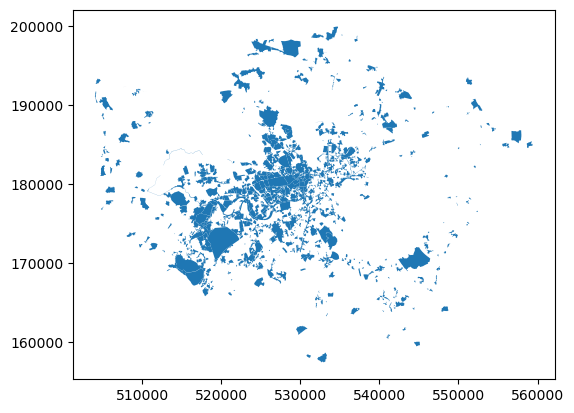

In [14]:
lonconservation.plot()

In [15]:
#checking the data in the GDF - most of this is not needed in this analysis, and will be dropped later
lonconservation.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 882 entries, 7112 to 8198
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dataset              882 non-null    object        
 1   end-date             882 non-null    object        
 2   entity               882 non-null    object        
 3   entry-date           882 non-null    datetime64[ms]
 4   name                 882 non-null    object        
 5   organisation-entity  882 non-null    object        
 6   prefix               882 non-null    object        
 7   reference            882 non-null    object        
 8   start-date           882 non-null    object        
 9   typology             882 non-null    object        
 10  documentation-url    631 non-null    object        
 11  document-url         526 non-null    object        
 12  designation-date     728 non-null    datetime64[ms]
 13  legislation          0 non-n

In [16]:
#importing to view layers in the gdb
import fiona

In [17]:
print(fiona.listlayers('VulnerableProperties.gdb'))

['CarehomesFinalRankingSummed20230809_Ply', 'HospitalsFinalRankingSummed20230809_Ply', 'ResiFinalRankingSummed20230818_Ply', 'SchoolsFinalRankingSummed20230809_Ply']


In [18]:
#opening the heat rank info. This layer is the only one of the four that contains LSOA data, so I will extract geographic and the UHeatRank from here
#even though I won't be working with the care home data
uhicarehome = gpd.read_file('VulnerableProperties.gdb', layer='CarehomesFinalRankingSummed20230809_Ply') 

In [19]:
uhicarehome.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LSOA21CD      4994 non-null   object  
 1   LSOA21NM      4994 non-null   object  
 2   T2            4994 non-null   float64 
 3   Ts            4994 non-null   float64 
 4   UHeatRank     4994 non-null   float64 
 5   SumofCareh    4994 non-null   float64 
 6   CountofCar    4994 non-null   float64 
 7   CarehomesR    4994 non-null   float64 
 8   UHEqIntRan    4994 non-null   float64 
 9   FinCHRank     4994 non-null   float64 
 10  Shape_Length  4994 non-null   float64 
 11  Shape_Area    4994 non-null   float64 
 12  geometry      4994 non-null   geometry
dtypes: float64(10), geometry(1), object(2)
memory usage: 507.3+ KB


In [20]:
uhicarehome.head()

LSOA21CD                   LSOA21NM         T2         Ts  UHeatRank  \
0  E01000009  Barking and Dagenham 016B  18.012268  21.352674        2.0   
1  E01000011  Barking and Dagenham 016C  17.971876  21.120684        2.0   
2  E01000020  Barking and Dagenham 023B  18.007818  20.699580        2.0   
3  E01000027  Barking and Dagenham 001A  17.558313  18.572937        1.0   
4  E01000028  Barking and Dagenham 001B  17.558313  18.572937        1.0   

   SumofCareh  CountofCar  CarehomesR  UHEqIntRan  FinCHRank  Shape_Length  \
0         5.0         1.0         2.0         2.0        4.0   2158.787983   
1         0.0         1.0         1.0         2.0        3.0   1543.085425   
2         1.0         1.0         1.0         2.0        3.0   3214.311520   
3         3.0         1.0         1.0         1.0        2.0   6752.453002   
4         3.0         1.0         1.0         1.0        2.0   2616.039084   

     Shape_Area                                           geometry  
0  1.279599e+05  MULTIPOLYGON (((544602.706 184628.237, 544605....  
1  9.163228e+04  MULTIPOLYGON (((544607.954 184727.846, 544620....  
2  1.872370e+05  MULTIPOLYGON (((547428.53 186681.765, 547431.5...  
3  1.474527e+06  MULTIPOLYGON (((548881.304 190819.98, 548881.1...  
4  1.438908e+05  MULTIPOLYGON (((547718.878 189697.291, 547777....

In [21]:
#dropping surplus columns
uhicarehome = uhicarehome[['LSOA21CD', 'LSOA21NM', 'UHeatRank', 'geometry']]

In [22]:
#I am interested in the effect of heat on residential properties so will extract that data from this layer
uhi_residential = gpd.read_file('VulnerableProperties.gdb', layer='ResiFinalRankingSummed20230818_Ply') 

In [23]:
#the distance_greenspace and distance_river variables were created by me in ArcGIS Pro for efficiency - the files were too large to process
#in Jupyter Notebook
uhi_residential.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COUNT                4994 non-null   float64 
 1   COUNT_Fina           4994 non-null   float64 
 2   SUM_FinalR           4994 non-null   float64 
 3   SUM_Fina00           4994 non-null   float64 
 4   ResiPropEI           4994 non-null   float64 
 5   T2                   4994 non-null   float64 
 6   Ts                   4994 non-null   float64 
 7   UHeatRank            4994 non-null   float64 
 8   UHEqIntRan           4994 non-null   float64 
 9   Over65_Qui           4994 non-null   float64 
 10  Under4_Qui           4994 non-null   float64 
 11  Under65Sin           4994 non-null   float64 
 12  IMD_Quinti           4994 non-null   float64 
 13  Resi_Quint           4994 non-null   float64 
 14  Resi_Score           4994 non-null   float64 
 15  ResiRnkQnt   

In [24]:
#because the original file had no metadata/data dictionary, I don't know what the majority of these columns are
#not going to work with the age related data so these have been dropped
uhi_residential = uhi_residential[['Resi_Score', 'IMD_Quinti', 'distance_river', 'distance_greenspace', 'geometry']]

In [25]:
#merging the two dataframes - the end goal of this data cleaning is to have one dataframe to work with
uhi_residential = uhicarehome.merge(uhi_residential, on='geometry', how='inner')

In [26]:
uhi_residential.head()

LSOA21CD                   LSOA21NM  UHeatRank  \
0  E01000009  Barking and Dagenham 016B        2.0   
1  E01000011  Barking and Dagenham 016C        2.0   
2  E01000020  Barking and Dagenham 023B        2.0   
3  E01000027  Barking and Dagenham 001A        1.0   
4  E01000028  Barking and Dagenham 001B        1.0   

                                            geometry  Resi_Score  IMD_Quinti  \
0  MULTIPOLYGON (((544602.706 184628.237, 544605....         5.0         5.0   
1  MULTIPOLYGON (((544607.954 184727.846, 544620....         3.0         4.0   
2  MULTIPOLYGON (((547428.53 186681.765, 547431.5...         5.0         5.0   
3  MULTIPOLYGON (((548881.304 190819.98, 548881.1...         3.0         5.0   
4  MULTIPOLYGON (((547718.878 189697.291, 547777....         5.0         5.0   

   distance_river  distance_greenspace  
0      275.826467             0.000000  
1        0.000000             0.000000  
2     1451.529854             3.266914  
3      140.159640             0.000000  
4      742.691119             4.736449

In [27]:
uhi_residential.describe()

UHeatRank   Resi_Score   IMD_Quinti  distance_river  \
count  4945.000000  4945.000000  4945.000000     4945.000000   
mean      2.973711     2.821234     3.000404      766.605270   
std       1.434138     1.346364     1.414643      923.657413   
min       0.000000     1.000000     1.000000        0.000000   
25%       2.000000     2.000000     2.000000        4.099039   
50%       3.000000     3.000000     3.000000      478.140254   
75%       4.000000     4.000000     4.000000     1112.490917   
max       5.000000     5.000000     5.000000     5744.856657   

       distance_greenspace  
count          4945.000000  
mean              8.675675  
std              30.576643  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max             430.545153

In [28]:
londonpoi = gpd.read_file('poi_5981204.gpkg') #poi data in London

In [29]:
londonpoi.head()

ref_no                                 name pointx_class  \
0  18369155    Hammersmith Friends Meeting House     06340459   
1  20136168                          Gospel Hall     06340459   
2  20136209                      The Gospel Hall     06340459   
3  18372853  Kingdom Hall of Jehovah's Witnesses     06340459   
4  18369845  Kingdom Hall of Jehovah's Witnesses     06340459   

               groupname                   categoryname          classname  \
0  Public Infrastructure  Infrastructure and Facilities  Places Of Worship   
1  Public Infrastructure  Infrastructure and Facilities  Places Of Worship   
2  Public Infrastructure  Infrastructure and Facilities  Places Of Worship   
3  Public Infrastructure  Infrastructure and Facilities  Places Of Worship   
4  Public Infrastructure  Infrastructure and Facilities  Places Of Worship   

   feature_easting  feature_northing  pos_accuracy          uprn  ...  \
0         522616.0          178432.0             1           NaN  ...   
1         534398.0          179132.0             1  2.000034e+11  ...   
2         522693.0          178595.0             1           NaN  ...   
3         532056.0          175861.0             1           NaN  ...   
4         523459.0          179519.0             1  3.403621e+07  ...   

  postcode                         admin_boundary telephone_number  \
0       W6  Hammersmith and Fulham London Borough             None   
1     SE16               Southwark London Borough             None   
2       W6  Hammersmith and Fulham London Borough             None   
3      SE5                 Lambeth London Borough             None   
4       W6  Hammersmith and Fulham London Borough             None   

              url                brand qualifier_type  \
0            None              Quakers       Religion   
1            None                 None       Religion   
2            None                 None       Religion   
3  www.jw.org/en/  Jehovah's Witnesses       Religion   
4  www.jw.org/en/  Jehovah's Witnesses       Religion   

                    qualifier_data       provenance supply_date  \
0               Quaker (Christian)  Ordnance Survey  2025-03-01   
1                Other (Christian)  Ordnance Survey  2025-03-01   
2                Other (Christian)  Ordnance Survey  2025-03-01   
3  Jehovah's Witnesses (Christian)  Ordnance Survey  2025-03-01   
4  Jehovah's Witnesses (Christian)  Ordnance Survey  2025-03-01   

                geometry  
0  POINT (522616 178432)  
1  POINT (534398 179132)  
2  POINT (522693 178595)  
3  POINT (532056 175861)  
4  POINT (523459 179519)  

[5 rows x 29 columns]

In [30]:
#it would be interesting to see if different kinds of POI have an affect on urban heat, but that may overcomplicate the analysis
londonpoi['groupname'].value_counts()

groupname
Commercial Services                   55267
Retail                                21586
Accommodation, Eating and Drinking    21513
Public Infrastructure                 18118
Education and Health                  12003
Transport                             11058
Attractions                            6180
Manufacturing and Production           5356
Sport and Entertainment                5012
Name: count, dtype: int64

In [31]:
sjoin_gdf = gpd.sjoin(londonpoi, uhi_residential) #merging the POI and UHI gdfs to count the amount of POIs in each LSOA
poi_counts = sjoin_gdf.groupby('LSOA21CD').size() #counting 

In [32]:
poi_counts.head() #checking the count worked (it did!)

LSOA21CD
E01000001    204
E01000002    376
E01000003     57
E01000005    433
E01000008     70
dtype: int64

In [33]:
uhi_residential['POI_count'] = uhi_residential['LSOA21CD'].map(poi_counts).fillna(0).astype(int) #adding the count back to my original GDF

In [34]:
#adding a column to say whether any part of the LSOA is in a conservation area
uhi_residential['conservation_area'] = uhi_residential.geometry.apply(lambda geom: lonconservation.geometry.intersects(geom).any())

In [35]:
uhi_residential['conservation_area'].value_counts()
#interestingly, the data is split almost half

conservation_area
False    2823
True     2122
Name: count, dtype: int64

In [36]:
uhi_residential[uhi_residential['conservation_area'] == True]['UHeatRank'].describe()
#urban heat rank is higher on average for conservation areas than for non-conservation areas

count    2122.000000
mean        3.212064
std         1.502877
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: UHeatRank, dtype: float64

In [37]:
uhi_residential[uhi_residential['conservation_area'] == False]['UHeatRank'].describe()

count    2823.000000
mean        2.794545
std         1.353112
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: UHeatRank, dtype: float64

In [38]:
#exploring whether greenspace or bluespace have an affect on urban heat
greenspace = gpd.read_file('opgrsp_gb.gpkg', layer='greenspace_site')

In [39]:
#greenspace and river data are both UK-wide
lonboroughsgreenspace = gpd.clip(greenspace, lonboroughs)

In [40]:
uhi_residential.head()

LSOA21CD                   LSOA21NM  UHeatRank  \
0  E01000009  Barking and Dagenham 016B        2.0   
1  E01000011  Barking and Dagenham 016C        2.0   
2  E01000020  Barking and Dagenham 023B        2.0   
3  E01000027  Barking and Dagenham 001A        1.0   
4  E01000028  Barking and Dagenham 001B        1.0   

                                            geometry  Resi_Score  IMD_Quinti  \
0  MULTIPOLYGON (((544602.706 184628.237, 544605....         5.0         5.0   
1  MULTIPOLYGON (((544607.954 184727.846, 544620....         3.0         4.0   
2  MULTIPOLYGON (((547428.53 186681.765, 547431.5...         5.0         5.0   
3  MULTIPOLYGON (((548881.304 190819.98, 548881.1...         3.0         5.0   
4  MULTIPOLYGON (((547718.878 189697.291, 547777....         5.0         5.0   

   distance_river  distance_greenspace  POI_count  conservation_area  
0      275.826467             0.000000          0              False  
1        0.000000             0.000000          0              False  
2     1451.529854             3.266914          0              False  
3      140.159640             0.000000          0               True  
4      742.691119             4.736449          0              False

In [41]:
rivers = gpd.read_file('oprvrs_gb.gpkg', layer='watercourse_link')

In [42]:
lonboroughsrivers = gpd.clip(rivers, lonboroughs)

In [43]:
#this is a dataset on occupancy of households - would be interesting to explore social factors relating to urban heat
overcrowding = pd.ExcelFile('hou04dataset.xlsx')
dfs = {sheet_name: overcrowding.parse(sheet_name) for sheet_name in overcrowding.sheet_names}

In [44]:
print(dfs.keys())

dict_keys(['Cover_sheet', 'Table_of_contents', 'Notes', '1a', '1b', '1c', '2', '3', '4', '5', '6', '7', '8', '9', '10'])


In [45]:
#parsing Excel sheet to get legible data
overcrowdlsoa = overcrowding.parse('1c', skiprows = range(0, 2))

In [46]:
overcrowdlsoa.head()

LSOA code                  LSOA name Occupancy rating of -1 or less  \
0  E01000001        City of London 001A                             25   
1  E01000002        City of London 001B                             25   
2  E01000003        City of London 001C                             50   
3  E01000005        City of London 001E                             75   
4  E01000006  Barking and Dagenham 016A                            135   

  Occupancy rating of 0  Occupancy rating of +1 Occupancy rating of +2 or more  
0                   455                     225                            135  
1                   475                     230                             95  
2                   740                     200                             25  
3                   325                      65                             15  
4                   180                     125                            120

In [47]:
overcrowdlsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   LSOA code                       35672 non-null  object
 1   LSOA name                       35672 non-null  object
 2   Occupancy rating of -1 or less  35672 non-null  object
 3   Occupancy rating of 0           35672 non-null  object
 4   Occupancy rating of +1          35672 non-null  int64 
 5   Occupancy rating of +2 or more  35672 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [48]:
#replacing all C values with 0 as they mean the same thing
overcrowdlsoa = overcrowdlsoa.replace('c', 0)

C:\Users\emily\AppData\Local\Temp\ipykernel_13928\1769818877.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  overcrowdlsoa = overcrowdlsoa.replace('c', 0)


In [49]:
overcrowdlsoa[['Occupancy rating of -1 or less', 'Occupancy rating of 0', 
    'Occupancy rating of +2 or more']] = overcrowdlsoa[['Occupancy rating of -1 or less', 'Occupancy rating of 0', 
                                             'Occupancy rating of +2 or more']].apply(pd.to_numeric)

In [50]:
#occupancy rating is lower when overcrowded - however, in the rest of my data, a higher score is more associated with higher urban heat
#therefore, I've reversed the ratings in order to ensure they have the same polarity
overcrowd_weight = {'Occupancy rating of -1 or less': 1,
           'Occupancy rating of 0': 0,
           'Occupancy rating of +1': -1,
           'Occupancy rating of +2 or more': -2}

In [51]:
#calculating an average 'occupancy score' for each LSOA based on the weights given 
overcrowdlsoa['occupancy_score'] = overcrowdlsoa.select_dtypes('number').dot(pd.Series
                                                                             (overcrowd_weight)) / overcrowdlsoa.select_dtypes('number').sum(axis=1)

In [52]:
#checking the process worked! interestingly, the mean occupancy score is -1 for the whole country, but further down in the London LSOAs,
#the occupancy score is higher
overcrowdlsoa.describe()

Occupancy rating of -1 or less  Occupancy rating of 0  \
count                    35672.000000           35672.000000   
mean                        27.885877             184.113731   
std                         35.310744             110.038101   
min                          0.000000               0.000000   
25%                          0.000000             100.000000   
50%                         15.000000             160.000000   
75%                         35.000000             240.000000   
max                        330.000000             895.000000   

       Occupancy rating of +1  Occupancy rating of +2 or more  occupancy_score  
count            35672.000000                    35672.000000     35672.000000  
mean               231.515474                      249.548105        -1.023770  
std                 71.323315                      117.629258         0.366385  
min                 45.000000                        0.000000        -1.879630  
25%                180.000000                      160.000000        -1.317460  
50%                225.000000                      240.000000        -1.072560  
75%                270.000000                      325.000000        -0.777778  
max                745.000000                     1060.000000         0.200000

In [53]:
overcrowdlsoa = overcrowdlsoa[['LSOA code', 'occupancy_score']]

In [54]:
#merging occupancy and the UHI data on LSOA code
uhi = uhi_residential.merge(overcrowdlsoa, left_on='LSOA21CD', right_on='LSOA code', how='left')

In [55]:
#dropping duplicates
uhi = uhi.drop('LSOA code', axis=1)

In [56]:
uhi.head()

LSOA21CD                   LSOA21NM  UHeatRank  \
0  E01000009  Barking and Dagenham 016B        2.0   
1  E01000011  Barking and Dagenham 016C        2.0   
2  E01000020  Barking and Dagenham 023B        2.0   
3  E01000027  Barking and Dagenham 001A        1.0   
4  E01000028  Barking and Dagenham 001B        1.0   

                                            geometry  Resi_Score  IMD_Quinti  \
0  MULTIPOLYGON (((544602.706 184628.237, 544605....         5.0         5.0   
1  MULTIPOLYGON (((544607.954 184727.846, 544620....         3.0         4.0   
2  MULTIPOLYGON (((547428.53 186681.765, 547431.5...         5.0         5.0   
3  MULTIPOLYGON (((548881.304 190819.98, 548881.1...         3.0         5.0   
4  MULTIPOLYGON (((547718.878 189697.291, 547777....         5.0         5.0   

   distance_river  distance_greenspace  POI_count  conservation_area  \
0      275.826467             0.000000          0              False   
1        0.000000             0.000000          0              False   
2     1451.529854             3.266914          0              False   
3      140.159640             0.000000          0               True   
4      742.691119             4.736449          0              False   

   occupancy_score  
0        -0.250000  
1        -0.400000  
2        -0.293233  
3        -0.451128  
4        -0.250000

In [57]:
uhi.describe()

UHeatRank   Resi_Score   IMD_Quinti  distance_river  \
count  4945.000000  4945.000000  4945.000000     4945.000000   
mean      2.973711     2.821234     3.000404      766.605270   
std       1.434138     1.346364     1.414643      923.657413   
min       0.000000     1.000000     1.000000        0.000000   
25%       2.000000     2.000000     2.000000        4.099039   
50%       3.000000     3.000000     3.000000      478.140254   
75%       4.000000     4.000000     4.000000     1112.490917   
max       5.000000     5.000000     5.000000     5744.856657   

       distance_greenspace    POI_count  occupancy_score  
count          4945.000000  4945.000000      4945.000000  
mean              8.675675    31.426289        -0.619737  
std              30.576643   129.931395         0.370945  
min               0.000000     0.000000        -1.776596  
25%               0.000000     0.000000        -0.866142  
50%               0.000000     0.000000        -0.553030  
75%               0.000000    32.000000        -0.329268  
max             430.545153  5766.000000         0.170886

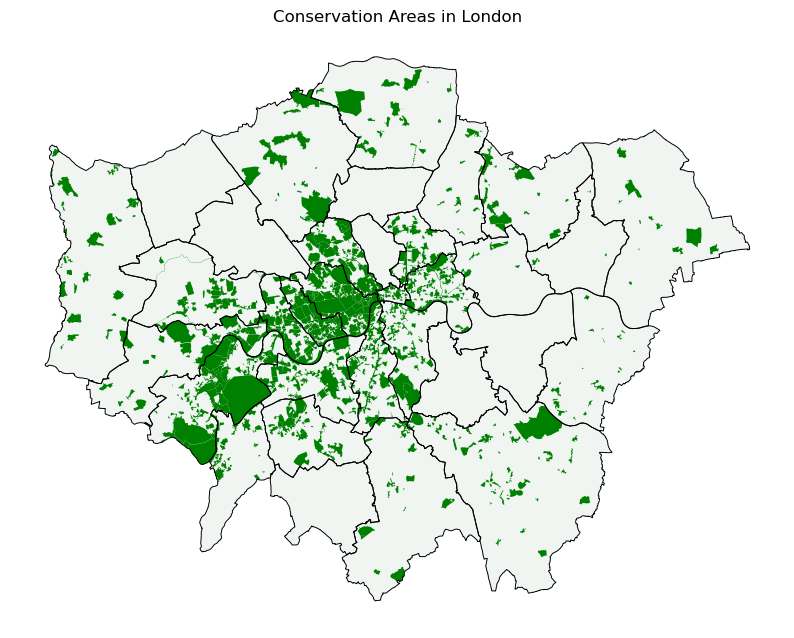

In [58]:
#created this map to help me visualise distribution of conservation areas across London
fig, ax = plt.subplots(figsize=(10,10))
lonboroughs.plot(ax = ax, facecolor = '#f0f5f2', edgecolor = 'white', linewidth = 0.2)
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
lonconservation.plot(ax = ax, color = 'green')
plt.title("Conservation Areas in London")
ax.set_axis_off()
plt.savefig('consareacontext.png', bbox_inches='tight')
plt.show()

In [59]:
londonbuildingheights = gpd.read_file('LondonBuildingHeights.shp')

In [60]:
londonbuildingheights.head()

OBJECTID                                ID  MEAN_mean  MIN_min  MAX_max  \
0     68753  0D4F7073C15027B3E050A00A568A259B   6.490812      0.0     7.67   
1     68754  0D4F7073C15127B3E050A00A568A259B   8.276826      0.0    12.01   
2     68755  0D4F7073C15227B3E050A00A568A259B   6.440366      0.0     7.85   
3     68756  0D4F7073C15327B3E050A00A568A259B   6.022876      0.0    10.10   
4     68757  0D4F7073C15427B3E050A00A568A259B   4.196970      0.0     6.33   

   Shape_Leng   Shape_Area    BNG_Area  \
0  129.039512   975.417513  379.918794   
1  141.216835  1237.860748  482.139726   
2  129.857638   982.583402  382.708627   
3  327.249592  2337.958244  910.720185   
4  202.034103  1584.366971  617.171928   

                                            geometry  
0  POLYGON ((527004.201 168860.9, 526989.801 1688...  
1  POLYGON ((527077.631 168883, 527085.041 168860...  
2  POLYGON ((527023.601 168865.8, 527015.851 1688...  
3  POLYGON ((527211.461 168601.72, 527234.951 168...  
4  POLYGON ((527273.101 168576.6, 527273.101 1685...

In [61]:
londonbuildingheights['MEAN_mean'].describe()

count    649747.000000
mean          5.744193
std           3.221329
min         -15.026124
25%           4.575475
50%           6.096549
75%           6.820478
max         108.650793
Name: MEAN_mean, dtype: float64

In [62]:
londonbuildingheights.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 649747 entries, 0 to 649746
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    649747 non-null  int64   
 1   ID          649747 non-null  object  
 2   MEAN_mean   649747 non-null  float64 
 3   MIN_min     649747 non-null  float64 
 4   MAX_max     649747 non-null  float64 
 5   Shape_Leng  649747 non-null  float64 
 6   Shape_Area  649747 non-null  float64 
 7   BNG_Area    649747 non-null  float64 
 8   geometry    649747 non-null  geometry
dtypes: float64(6), geometry(1), int64(1), object(1)
memory usage: 44.6+ MB


In [63]:
#the londonbuildingheights dataset is massive, i will calculate the mean building height for each LSOA to standardise the data
buildheightmean = gpd.sjoin(londonbuildingheights[['geometry', 'MEAN_mean']], uhi_residential[['geometry']], how='inner', predicate='intersects')
mean_heights = buildheightmean.groupby('index_right')['MEAN_mean'].mean()

In [64]:
mean_heights.describe()

count    4943.000000
mean        6.825199
std         2.662705
min         0.000000
25%         5.700631
50%         6.286432
75%         7.560475
max        30.643639
Name: MEAN_mean, dtype: float64

In [65]:
#adding the mean building height by LSOA to the main gdf
uhi['mean_building_height'] = uhi.index.map(mean_heights)

In [66]:
londonhousingdensity = gpd.read_file('London_Housing_Density.shp')

In [67]:
londonhousingdensity.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38647 entries, 0 to 38646
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Houses      38647 non-null  int64   
 1   Density     38647 non-null  float64 
 2   Hectares    38647 non-null  float64 
 3   House_Hect  38647 non-null  float64 
 4   geometry    38647 non-null  geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 1.5 MB


In [68]:
#same process as building heights
housingdensitymean = gpd.sjoin(londonhousingdensity[['geometry', 'Density']], uhi[['geometry']], how='inner', predicate='intersects')
mean_density = housingdensitymean.groupby('index_right')['Density'].mean()

In [69]:
mean_density.describe()

count    4945.000000
mean        0.005095
std         0.002961
min         0.000127
25%         0.002908
50%         0.004274
75%         0.006707
max         0.021566
Name: Density, dtype: float64

In [70]:
#mapping the created list of LSOA mean building density onto a new column in the main dataframe
uhi['mean_housing_density'] = uhi.index.map(mean_density)

In [71]:
#for testing later, i'm going to create a column for high Urban Heat LSOAs in conservation areas!
uhi['HighUHR_Conservation'] = (
    (uhi['UHeatRank'] >= 4) & 
    (uhi['conservation_area'] == 1)
)

In [72]:
uhi['HighUHR_Conservation'].value_counts()

HighUHR_Conservation
False    3899
True     1046
Name: count, dtype: int64

In [73]:
#this is the final dataset!
uhi.head()

LSOA21CD                   LSOA21NM  UHeatRank  \
0  E01000009  Barking and Dagenham 016B        2.0   
1  E01000011  Barking and Dagenham 016C        2.0   
2  E01000020  Barking and Dagenham 023B        2.0   
3  E01000027  Barking and Dagenham 001A        1.0   
4  E01000028  Barking and Dagenham 001B        1.0   

                                            geometry  Resi_Score  IMD_Quinti  \
0  MULTIPOLYGON (((544602.706 184628.237, 544605....         5.0         5.0   
1  MULTIPOLYGON (((544607.954 184727.846, 544620....         3.0         4.0   
2  MULTIPOLYGON (((547428.53 186681.765, 547431.5...         5.0         5.0   
3  MULTIPOLYGON (((548881.304 190819.98, 548881.1...         3.0         5.0   
4  MULTIPOLYGON (((547718.878 189697.291, 547777....         5.0         5.0   

   distance_river  distance_greenspace  POI_count  conservation_area  \
0      275.826467             0.000000          0              False   
1        0.000000             0.000000          0              False   
2     1451.529854             3.266914          0              False   
3      140.159640             0.000000          0               True   
4      742.691119             4.736449          0              False   

   occupancy_score  mean_building_height  mean_housing_density  \
0        -0.250000              5.512367              0.005407   
1        -0.400000              5.965604              0.006113   
2        -0.293233              6.385375              0.004083   
3        -0.451128              0.900397              0.000931   
4        -0.250000              0.000000              0.002722   

   HighUHR_Conservation  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

In [74]:
#necessary module for z-scores
from sklearn.preprocessing import StandardScaler

In [75]:
#changing the Boolean values to categorical numeric so it can be used in correlation and statistical analysis
uhi_stat_gdb = uhi.replace({True: 1, False: 0})

C:\Users\emily\AppData\Local\Temp\ipykernel_13928\797503735.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  uhi_stat_gdb = uhi.replace({True: 1, False: 0})


In [76]:
#creating z-scores for the continuous data to standardise it, and to enable more accurate regression and categorisation
scaler = StandardScaler()
uhi_stat_gdb[['distance_river', 'distance_greenspace', 
              'occupancy_score', 'mean_housing_density', 'mean_building_height', 
              'POI_count']] = scaler.fit_transform(uhi_stat_gdb[['distance_river', 'distance_greenspace', 'occupancy_score', 
                                                                 'mean_housing_density', 'mean_building_height', 'POI_count']])

In [77]:
#creating a non-geographic dataframe for the non-geographic analysis
uhi_stat = uhi_stat_gdb.drop(columns=['geometry', 'LSOA21CD', 'LSOA21NM'])

In [78]:
uhi_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UHeatRank             4945 non-null   float64
 1   Resi_Score            4945 non-null   float64
 2   IMD_Quinti            4945 non-null   float64
 3   distance_river        4945 non-null   float64
 4   distance_greenspace   4945 non-null   float64
 5   POI_count             4945 non-null   float64
 6   conservation_area     4945 non-null   int64  
 7   occupancy_score       4945 non-null   float64
 8   mean_building_height  4943 non-null   float64
 9   mean_housing_density  4945 non-null   float64
 10  HighUHR_Conservation  4945 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 425.1 KB


In [79]:
uhi_stat_gdb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LSOA21CD              4945 non-null   object  
 1   LSOA21NM              4945 non-null   object  
 2   UHeatRank             4945 non-null   float64 
 3   geometry              4945 non-null   geometry
 4   Resi_Score            4945 non-null   float64 
 5   IMD_Quinti            4945 non-null   float64 
 6   distance_river        4945 non-null   float64 
 7   distance_greenspace   4945 non-null   float64 
 8   POI_count             4945 non-null   float64 
 9   conservation_area     4945 non-null   int64   
 10  occupancy_score       4945 non-null   float64 
 11  mean_building_height  4943 non-null   float64 
 12  mean_housing_density  4945 non-null   float64 
 13  HighUHR_Conservation  4945 non-null   int64   
dtypes: float64(9), geometry(1), int64(2), object(2)


In [80]:
uhi_stat.head()

UHeatRank  Resi_Score  IMD_Quinti  distance_river  distance_greenspace  \
0        2.0         5.0         5.0       -0.531397            -0.283764   
1        2.0         3.0         4.0       -0.830051            -0.283764   
2        2.0         5.0         5.0        0.741610            -0.176910   
3        1.0         3.0         5.0       -0.678292            -0.283764   
4        1.0         5.0         5.0       -0.025893            -0.128844   

   POI_count  conservation_area  occupancy_score  mean_building_height  \
0  -0.241893                  0         0.996845             -0.493094   
1  -0.241893                  0         0.592431             -0.322860   
2  -0.241893                  0         0.880285             -0.165196   
3  -0.241893                  1         0.454586             -2.225331   
4  -0.241893                  0         0.996845             -2.563517   

   mean_housing_density  HighUHR_Conservation  
0              0.105243                     0  
1              0.343753                     0  
2             -0.341879                     0  
3             -1.406622                     0  
4             -0.801689                     0

In [81]:
uhi_stat_gdb.head()

LSOA21CD                   LSOA21NM  UHeatRank  \
0  E01000009  Barking and Dagenham 016B        2.0   
1  E01000011  Barking and Dagenham 016C        2.0   
2  E01000020  Barking and Dagenham 023B        2.0   
3  E01000027  Barking and Dagenham 001A        1.0   
4  E01000028  Barking and Dagenham 001B        1.0   

                                            geometry  Resi_Score  IMD_Quinti  \
0  MULTIPOLYGON (((544602.706 184628.237, 544605....         5.0         5.0   
1  MULTIPOLYGON (((544607.954 184727.846, 544620....         3.0         4.0   
2  MULTIPOLYGON (((547428.53 186681.765, 547431.5...         5.0         5.0   
3  MULTIPOLYGON (((548881.304 190819.98, 548881.1...         3.0         5.0   
4  MULTIPOLYGON (((547718.878 189697.291, 547777....         5.0         5.0   

   distance_river  distance_greenspace  POI_count  conservation_area  \
0       -0.531397            -0.283764  -0.241893                  0   
1       -0.830051            -0.283764  -0.241893                  0   
2        0.741610            -0.176910  -0.241893                  0   
3       -0.678292            -0.283764  -0.241893                  1   
4       -0.025893            -0.128844  -0.241893                  0   

   occupancy_score  mean_building_height  mean_housing_density  \
0         0.996845             -0.493094              0.105243   
1         0.592431             -0.322860              0.343753   
2         0.880285             -0.165196             -0.341879   
3         0.454586             -2.225331             -1.406622   
4         0.996845             -2.563517             -0.801689   

   HighUHR_Conservation  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [82]:
#dropping rows with UHeatRank 0 - it only goes from 1-5 so there should be no 0 values
uhi = uhi[uhi['UHeatRank'] != 0]

## Data Visualisation

In [84]:
#needed for sophisticated mapping and graphs
import seaborn as sns

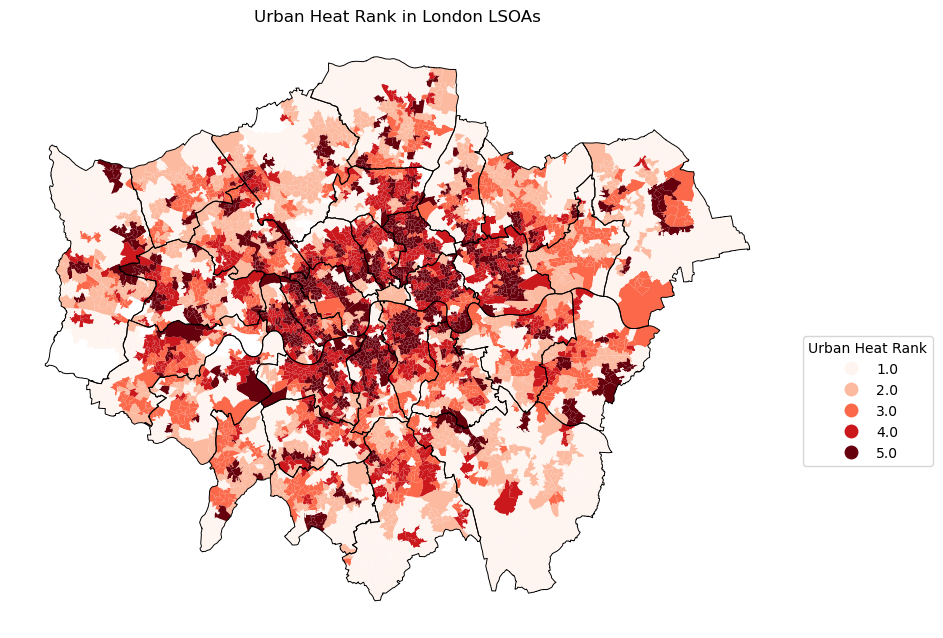

In [85]:
#creating visualisations for report
fig, ax = plt.subplots(figsize=(10, 10))
uhi.plot(ax = ax,column = 'UHeatRank', legend = True, cmap='Reds', categorical=True) 
#categorical=True is needed because the 1-5 scale is categorical, not continuous 
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7) #to give context to the map - not adding labels because this would overcrowd it 
plt.title("Urban Heat Rank in London LSOAs")
leg = ax.get_legend() 
leg.set_title("Urban Heat Rank")
leg.set_bbox_to_anchor((1.2, 0.5)) #ensuring legend doesn't cover the map
ax.set_axis_off()
plt.savefig('uheatrank_map.png', bbox_inches='tight')
plt.show()

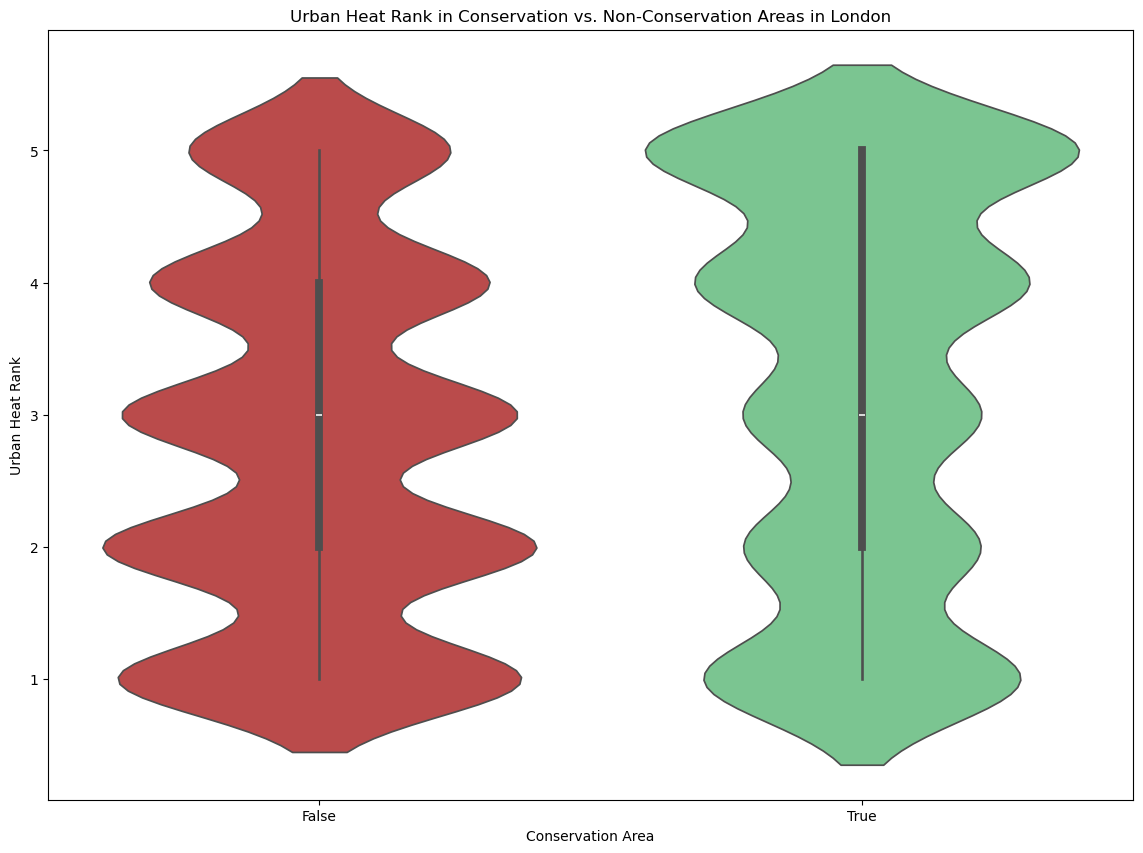

In [86]:
conservationuhi = {True: "#6fd18c", False: "#cc3939"} #creating a custom palette for these two values

fig, ax = plt.subplots(figsize=(14, 10))
sns.violinplot(data=uhi, x='conservation_area',y='UHeatRank', hue='conservation_area', palette=conservationuhi)
plt.legend([],[], frameon=False) #i didn't view the legend as necessary as all information is already visible on the plot
ax.set_title('Urban Heat Rank in Conservation vs. Non-Conservation Areas in London')
plt.xlabel('Conservation Area')
plt.ylabel('Urban Heat Rank')
plt.savefig('uhrank_conservation_violin.png', bbox_inches='tight')
plt.show()

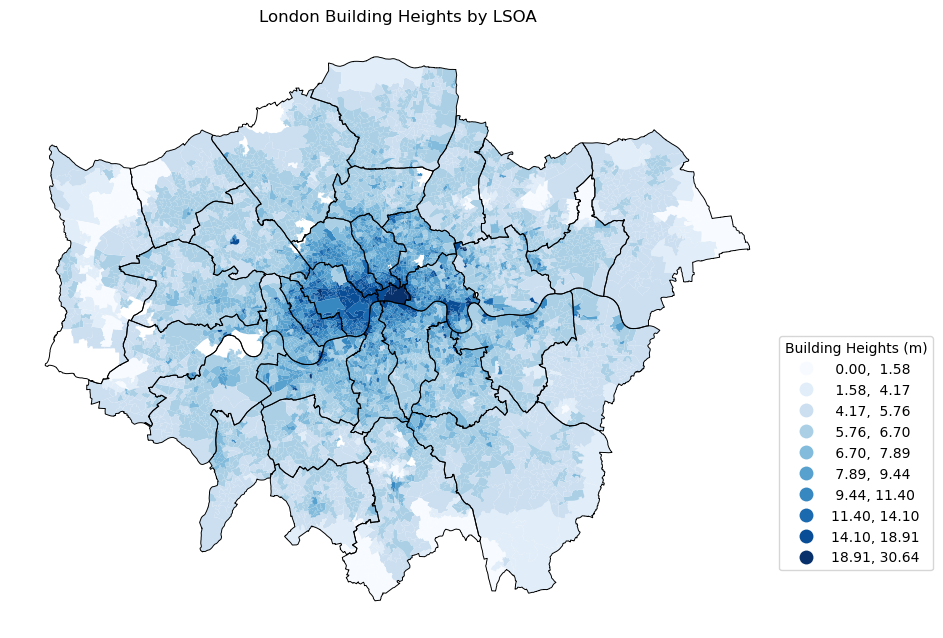

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))
uhi.plot(ax = ax,column = 'mean_building_height', scheme = 'natural_breaks', k = 10, legend = True, cmap='Blues') #natural breaks showed the variations the best
plt.title("London Building Heights by LSOA")
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
leg = ax.get_legend() 
leg.set_title("Building Heights (m)")
leg.set_bbox_to_anchor((1.2, 0.5))
ax.set_axis_off()
plt.savefig('buildingheight.png', bbox_inches='tight')
plt.show()

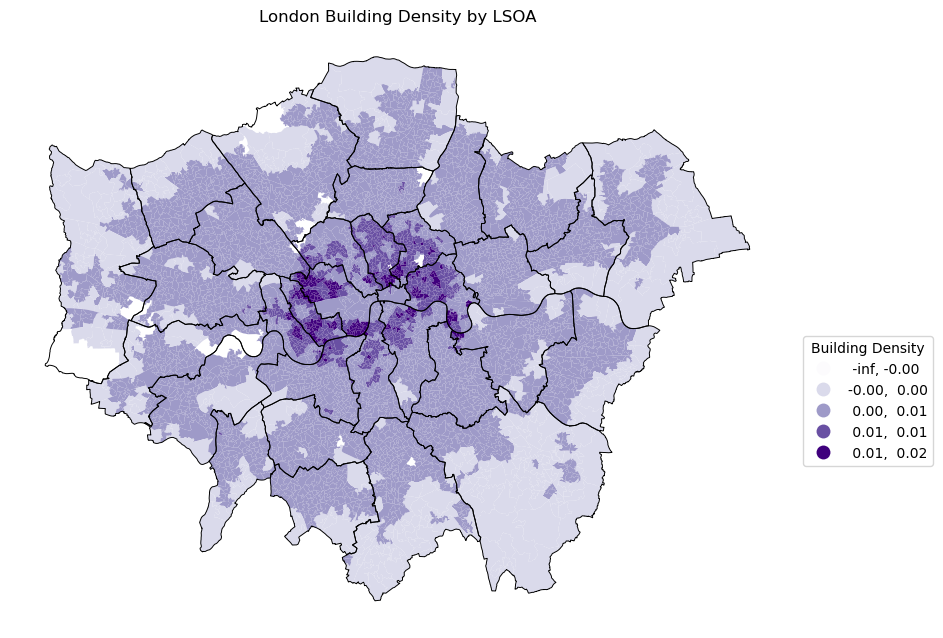

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
uhi.plot(ax = ax,column = 'mean_housing_density', scheme = 'std_mean', k = 10, legend = True, cmap='Purples') #natural breaks showed the variations the best
plt.title("London Building Density by LSOA")
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
leg = ax.get_legend() 
leg.set_title("Building Density")
leg.set_bbox_to_anchor((1.2, 0.5))
ax.set_axis_off()
plt.savefig('buildingdensity.png', bbox_inches='tight')
plt.show()

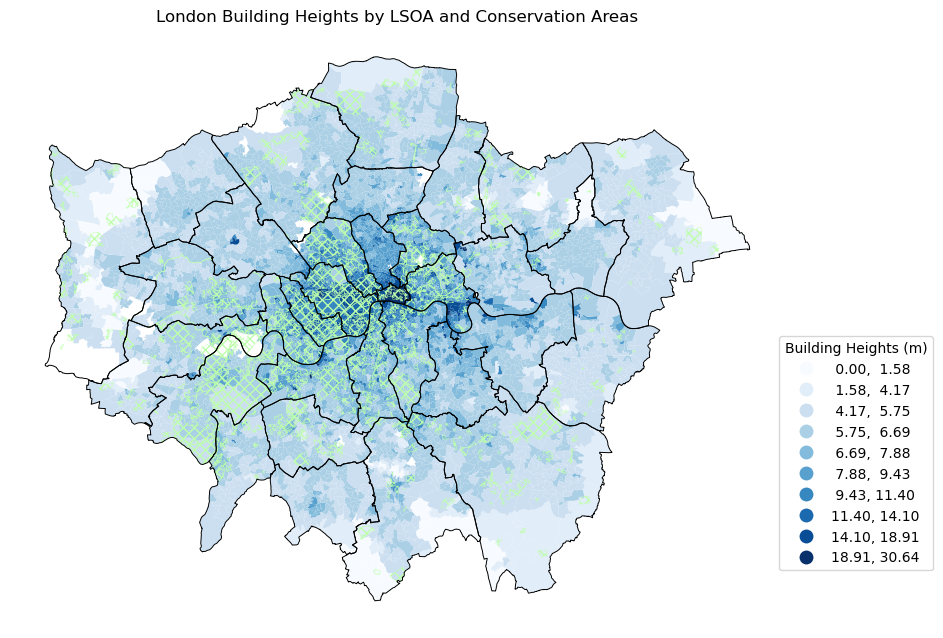

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
uhi.plot(ax = ax,column = 'mean_building_height', scheme = 'natural_breaks', k = 10, legend = True, cmap='Blues')
plt.title("London Building Heights by LSOA and Conservation Areas")
lonconservation.plot(ax=ax, facecolor='none', edgecolor='#beffab', hatch='xxx', linewidth=0.3) 
#i thought being able to see where tall buildings were in conservation areas would be visually helpful in the report
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
leg = ax.get_legend() 
leg.set_title("Building Heights (m)")
leg.set_bbox_to_anchor((1.2, 0.5))
ax.set_axis_off()
plt.savefig('buildingheightconservation.png',  bbox_inches='tight')
plt.show()

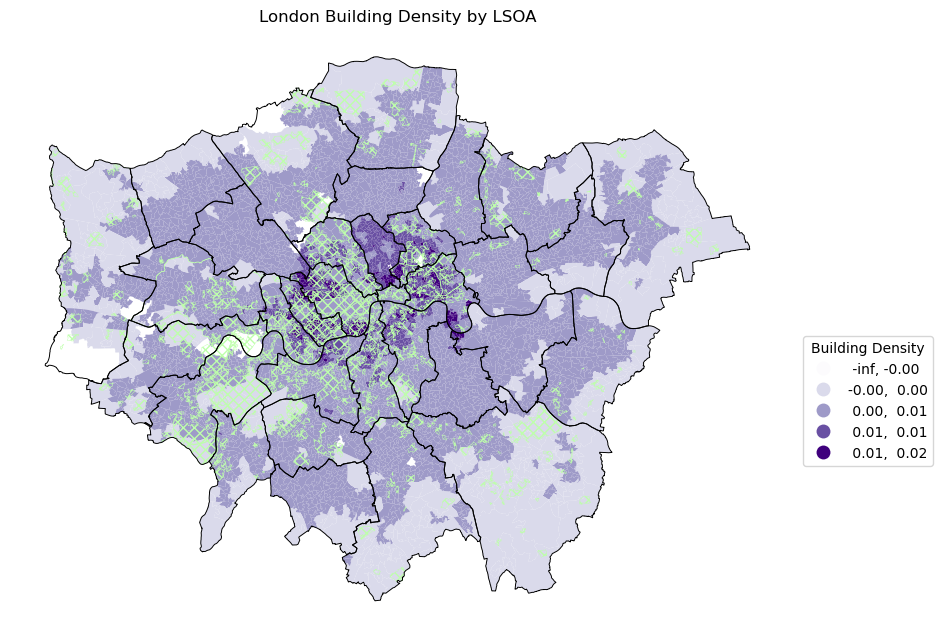

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
uhi.plot(ax = ax,column = 'mean_housing_density', scheme = 'std_mean', k = 10, legend = True, cmap='Purples') #natural breaks showed the variations the best
plt.title("London Building Density by LSOA")
lonconservation.plot(ax=ax, facecolor='none', edgecolor='#beffab', hatch='xxx', linewidth=0.3) 
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
leg = ax.get_legend() 
leg.set_title("Building Density")
leg.set_bbox_to_anchor((1.2, 0.5))
ax.set_axis_off()
plt.savefig('buildingdensityconservation.png', bbox_inches='tight')
plt.show()

In [91]:
from matplotlib.colors import ListedColormap

In [92]:
uhi_stat_map = uhi_stat_gdb
uhi_stat_map['HighUHR_Conservation'] = uhi_stat_gdb['HighUHR_Conservation'].map({0: 'No', 1: 'Yes'}) 
#changing from int to string for purposes of the legend

In [93]:
uhi_stat_map['HighUHR_Conservation'].value_counts()

HighUHR_Conservation
No     3899
Yes    1046
Name: count, dtype: int64

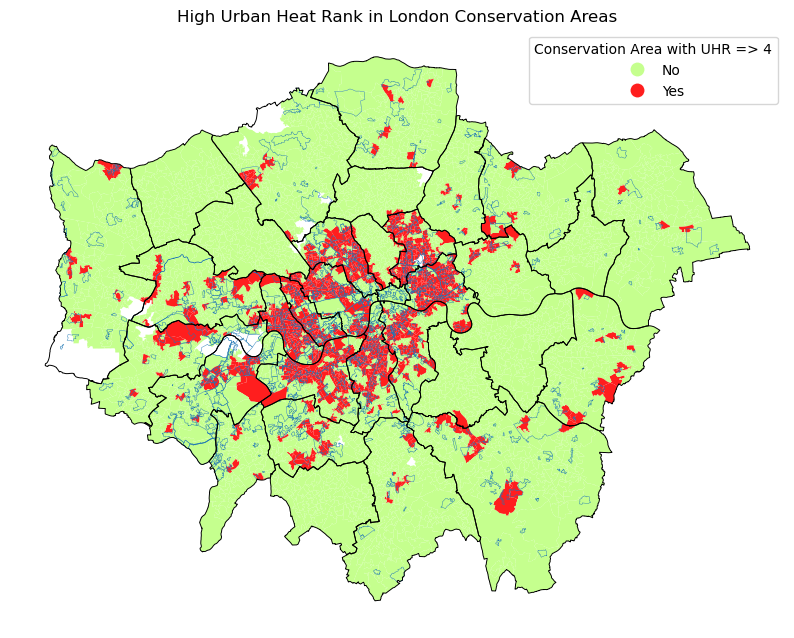

In [94]:
#another technique to create a custom palette - i'm not using the previously created conservationuhi palette because the false value
#was red, and the true was red, which is the polar opposite to this map
highUHRcmap = ListedColormap(['#c5ff8e', '#ff1e1e']) 

fig, ax = plt.subplots(figsize=(10, 10))
uhi_stat_map.plot(ax = ax,column = 'HighUHR_Conservation', cmap = highUHRcmap,  legend=True,
    legend_kwds={'title': 'Conservation Area with UHR => 4'})
lonconservation.boundary.plot(ax = ax, linewidth=0.3)
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
plt.title("High Urban Heat Rank in London Conservation Areas")
ax.set_axis_off()
plt.savefig('highuhr_cons_map.png', bbox_inches='tight')
plt.show()

## Data Analysis

In [96]:
import scipy.stats as stats 

In [97]:
#conducting t-test to see if the two groups are statistically different from each other
conservationareaUHI = uhi_stat.loc[uhi_stat['conservation_area'] == True, 'UHeatRank']
lonboroughsUHI = uhi_stat.loc[uhi_stat['conservation_area'] == False, 'UHeatRank']

In [98]:
stats, pvalue = stats.ttest_ind(conservationareaUHI, lonboroughsUHI)

In [99]:
print(stats, pvalue)

10.238673365330099 2.325787649554706e-24


In [100]:
correlation = uhi_stat.drop(columns='HighUHR_Conservation', axis=1) 
#this is dropped for the correlation because it would be collinear with UHR and conservation area, and not reveal anything new

Text(0.5, 1.0, 'Correlation Heatmap')

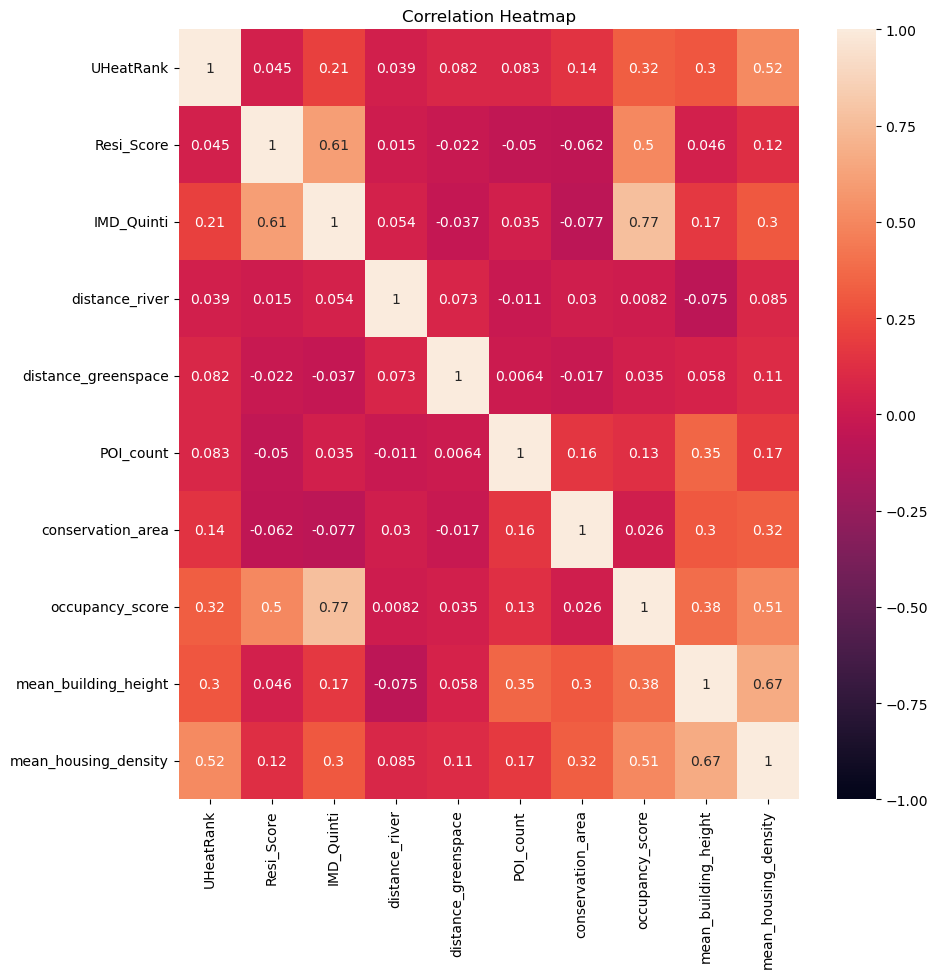

In [101]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(correlation.select_dtypes('number').corr(), vmin=-1, vmax=1, annot=True) #selecting only numerical values in the dataset
#and showing the annotations/values on the squares
plt.title('Correlation Heatmap')

In [102]:
correlation2 = uhi_stat.drop(columns=['UHeatRank', 'conservation_area'], axis=1) 
#creating a separate dataframe for the conservation areas with high UHR variable

Text(0.5, 1.0, 'Correlation Heatmap')

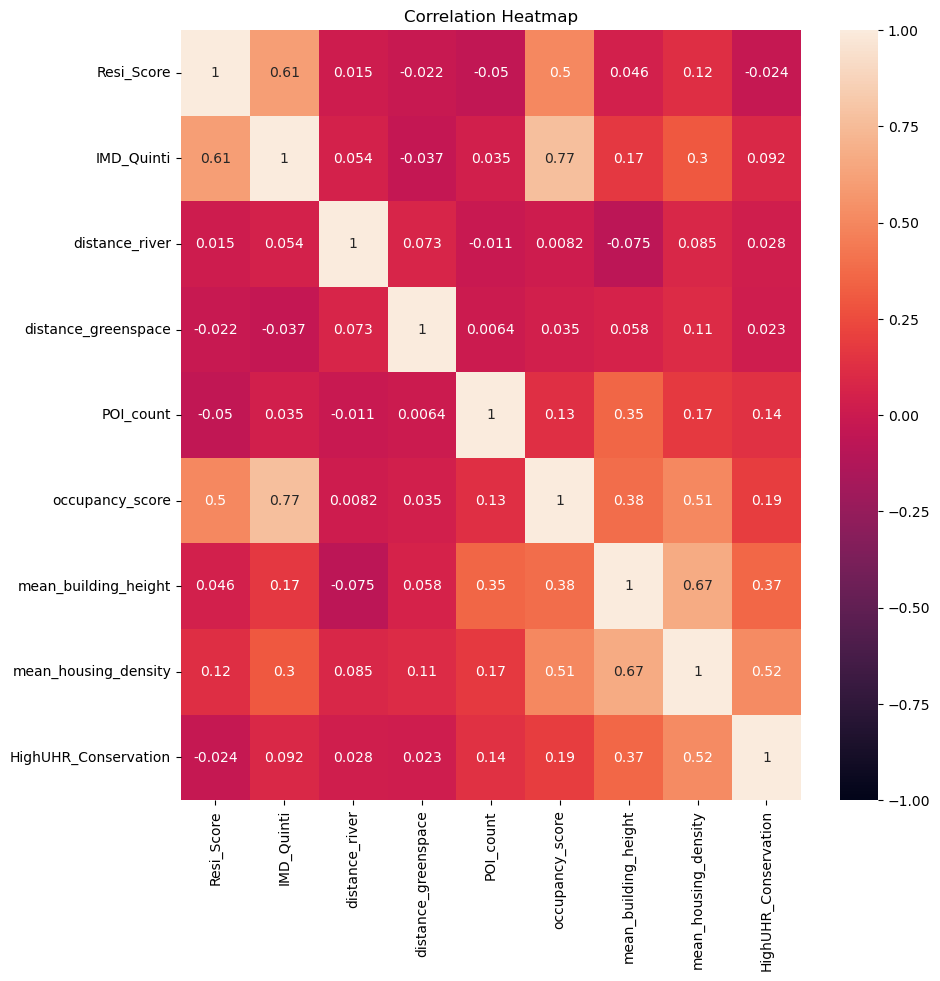

In [103]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(correlation2.select_dtypes('number').corr(), vmin=-1, vmax=1, annot=True) 
plt.title('Correlation Heatmap')

In [104]:
import statsmodels.api as sm #for the regression
import numpy as np #to create arrays, for classification model and random forest regression

In [105]:
uhi_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UHeatRank             4945 non-null   float64
 1   Resi_Score            4945 non-null   float64
 2   IMD_Quinti            4945 non-null   float64
 3   distance_river        4945 non-null   float64
 4   distance_greenspace   4945 non-null   float64
 5   POI_count             4945 non-null   float64
 6   conservation_area     4945 non-null   int64  
 7   occupancy_score       4945 non-null   float64
 8   mean_building_height  4943 non-null   float64
 9   mean_housing_density  4945 non-null   float64
 10  HighUHR_Conservation  4945 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 425.1 KB


In [106]:
X = uhi_stat.drop(['UHeatRank', 'HighUHR_Conservation'], axis=1) #dropping both the dependent variable, and the High UHR Conservation variable
y = uhi_stat['UHeatRank'] #setting dependent variable 

In [107]:
#regression won't work with any NaNs or infinite numbers so these have to be dropped
print(np.any(np.isnan(X)))
print(np.any(np.isinf(y)))

True
False


In [108]:
print(X.isna().sum())

Resi_Score              0
IMD_Quinti              0
distance_river          0
distance_greenspace     0
POI_count               0
conservation_area       0
occupancy_score         0
mean_building_height    2
mean_housing_density    0
dtype: int64


In [109]:
X = X.dropna()
y = y.loc[X.index] #making sure that y is the same length as X

In [110]:
X_reg = sm.add_constant(X) #adding intercept
uhi_mreg = sm.OLS(y, X_reg).fit() #creating the model
print(uhi_mreg.summary()) #seeing how well the model worked!

                            OLS Regression Results                            
Dep. Variable:              UHeatRank   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        12:14:38   Log-Likelihood:                -7975.2
No. Observations:                4943   AIC:                         1.597e+04
Df Residuals:                    4933   BIC:                         1.604e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.1416 

In [111]:
#linear regression is probably not the best route for this data! R2 value shows only 28% of variance in dependent variable
#is explained by the independent variables in the model

In [112]:
from sklearn.ensemble import RandomForestClassifier #creating a machine learning model 
from sklearn.model_selection import train_test_split #for dividing the data into training and testing data
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
#SMOTE(Synthetic Minority Over-sampling Technique) is used here to create more samples for the 
#minority class (conservation areas with high urban heat ranks)

In [113]:
X = uhi_stat.drop(['UHeatRank', 'conservation_area', 'HighUHR_Conservation'], axis=1) #urban heat rank and conservation area would
#confuse the classification model
y = uhi_stat['HighUHR_Conservation'] #setting dependent variable 

In [114]:
#same data tidying process as the regression model
print(np.any(np.isnan(X)))
print(np.any(np.isinf(y)))

True
False


In [115]:
X = X.dropna()
y = y.loc[X.index]

In [116]:
labels_array = y.to_numpy() 

In [117]:
urbanheatcons_array = X.to_numpy() 

In [118]:
train_data, test_data, train_lab, test_lab = train_test_split(urbanheatcons_array, labels_array, test_size=0.2) #splitting data into training and testing
#default train/test split is 75/25, but I have chosen to include more training data to hopefully improve accuracy of the model

In [119]:
smote = SMOTE(random_state=42) #oversampling the data to make up for imbalanced classes 
train_data_s, train_lab_s = smote.fit_resample(train_data, train_lab)

In [120]:
forest=RandomForestClassifier(class_weight='balanced', n_estimators=500, random_state=42) #setting 500 estimators
#500 is able to run on my computer while allowing for sufficient complexity in the model
#using class_weight='balanced' because there are an unbalanced amount of variables in each category

In [121]:
forest.fit(train_data_s,train_lab_s) #fitting the classification model

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [122]:
forest.score(test_data, test_lab) #provides mean accuracy score of model

0.8351870576339737

In [123]:
test_predictions = forest.predict(test_data) #generating predicted category based on the test data to validate the model

In [124]:
confusion_matrix = metrics.confusion_matrix(test_lab, test_predictions) #creating confusion matrix 

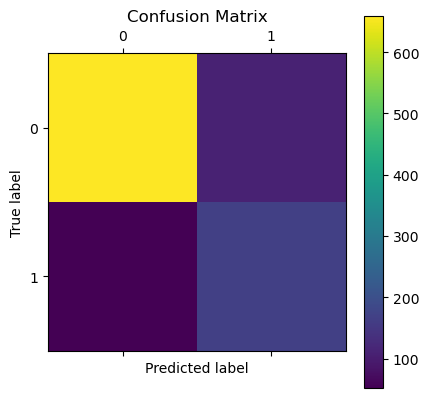

In [125]:
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusionmatrix.png', bbox_inches='tight')
plt.show()

In [126]:
print(metrics.classification_report(test_lab, test_predictions, zero_division=0)) #showing results from classification model

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       770
           1       0.60      0.76      0.67       219

    accuracy                           0.84       989
   macro avg       0.76      0.81      0.78       989
weighted avg       0.85      0.84      0.84       989



In [127]:
featimportances = forest.feature_importances_
featnames = X.columns

rf_importance = pd.DataFrame({
    'Feature': featnames,
    'Importance': featimportances
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

                Feature  Importance
7  mean_housing_density    0.281509
6  mean_building_height    0.186796
4             POI_count    0.184086
5       occupancy_score    0.120634
2        distance_river    0.107074
0            Resi_Score    0.047908
1            IMD_Quinti    0.045749
3   distance_greenspace    0.026244


In [128]:
from mgwr.gwr import GWR #importing necessary modules for the geographically weighted regression
import numba

In [129]:
uhi_stat_gdb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LSOA21CD              4945 non-null   object  
 1   LSOA21NM              4945 non-null   object  
 2   UHeatRank             4945 non-null   float64 
 3   geometry              4945 non-null   geometry
 4   Resi_Score            4945 non-null   float64 
 5   IMD_Quinti            4945 non-null   float64 
 6   distance_river        4945 non-null   float64 
 7   distance_greenspace   4945 non-null   float64 
 8   POI_count             4945 non-null   float64 
 9   conservation_area     4945 non-null   int64   
 10  occupancy_score       4945 non-null   float64 
 11  mean_building_height  4943 non-null   float64 
 12  mean_housing_density  4945 non-null   float64 
 13  HighUHR_Conservation  4945 non-null   object  
dtypes: float64(9), geometry(1), int64(1), object(3)


In [130]:
uhi_stat_gdb = uhi_stat_gdb.dropna() #dropping NAs from the dataframe so the GWR works 

In [131]:
#creating an original geometry column so this can be restored after work with centroids is done
uhi_stat_gdb['original geometry'] = uhi_stat_gdb['geometry']

C:\Users\emily\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [132]:
#changing the geometry to centroid points, so x and y can be extracted - essential for GWR
uhi_stat_gdb['geometry'] = uhi_stat_gdb.geometry.centroid
uhi_stat_gdb['x'] = uhi_stat_gdb.geometry.x
uhi_stat_gdb['y'] = uhi_stat_gdb.geometry.y 

C:\Users\emily\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\emily\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [133]:
X = uhi_stat_gdb[['distance_river', 'distance_greenspace', 'conservation_area', 'occupancy_score', 'mean_housing_density',
                 'mean_building_height']]

In [134]:
g_coords = list(zip(uhi_stat_gdb.y, uhi_stat_gdb.x))
g_y = np.asarray(uhi_stat_gdb['UHeatRank']).reshape((-1,1))
g_X = np.asarray(X)
#same process as OLS regression

In [135]:
print(len(g_coords), g_y.shape[0], g_X.shape[0]) #checking arrays are all the same shape

4943 4943 4943


In [136]:
gwr = GWR(g_coords, g_y, g_X, 230) #chose 230 after trialling other bandwidth values - unfortunately, I couldn't get SelBW to work
gwr_results = gwr.fit() #fitting model to data
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                4943
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           7348.878
Log-likelihood:                                                   -7993.949
AIC:                                                              16001.898
AICc:                                                             16003.927
BIC:                                                             -34635.394
R2:                                                                   0.277
Adj. R2:                                                              0.276

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [137]:
uhi_stat_gdb['geometry'] = uhi_stat_gdb['original geometry'] #restoring polygon geometries for mapping

C:\Users\emily\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [138]:
uhi_stat_gdb['Conservation_Coefficient'] = gwr_results.params[:, 3] #extracting Conservation Area variable coefficient 
#this is to visualise difference spatially on effect of conservation area presence on urban heat

C:\Users\emily\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [139]:
uhi_stat_gdb.head()

LSOA21CD                   LSOA21NM  UHeatRank  \
0  E01000009  Barking and Dagenham 016B        2.0   
1  E01000011  Barking and Dagenham 016C        2.0   
2  E01000020  Barking and Dagenham 023B        2.0   
3  E01000027  Barking and Dagenham 001A        1.0   
4  E01000028  Barking and Dagenham 001B        1.0   

                                            geometry  Resi_Score  IMD_Quinti  \
0  MULTIPOLYGON (((544602.706 184628.237, 544605....         5.0         5.0   
1  MULTIPOLYGON (((544607.954 184727.846, 544620....         3.0         4.0   
2  MULTIPOLYGON (((547428.53 186681.765, 547431.5...         5.0         5.0   
3  MULTIPOLYGON (((548881.304 190819.98, 548881.1...         3.0         5.0   
4  MULTIPOLYGON (((547718.878 189697.291, 547777....         5.0         5.0   

   distance_river  distance_greenspace  POI_count  conservation_area  \
0       -0.531397            -0.283764  -0.241893                  0   
1       -0.830051            -0.283764  -0.241893                  0   
2        0.741610            -0.176910  -0.241893                  0   
3       -0.678292            -0.283764  -0.241893                  1   
4       -0.025893            -0.128844  -0.241893                  0   

   occupancy_score  mean_building_height  mean_housing_density  \
0         0.996845             -0.493094              0.105243   
1         0.592431             -0.322860              0.343753   
2         0.880285             -0.165196             -0.341879   
3         0.454586             -2.225331             -1.406622   
4         0.996845             -2.563517             -0.801689   

  HighUHR_Conservation                                  original geometry  \
0                   No  MULTIPOLYGON (((544602.706 184628.237, 544605....   
1                   No  MULTIPOLYGON (((544607.954 184727.846, 544620....   
2                   No  MULTIPOLYGON (((547428.53 186681.765, 547431.5...   
3                   No  MULTIPOLYGON (((548881.304 190819.98, 548881.1...   
4                   No  MULTIPOLYGON (((547718.878 189697.291, 547777....   

               x              y  Conservation_Coefficient  
0  544601.662804  184456.549041                 -0.522594  
1  544384.247989  184738.452087                 -0.529927  
2  547394.540830  186297.196025                 -0.413049  
3  548473.125836  190175.614501                 -0.178410  
4  547631.285136  189508.230220                 -0.186675

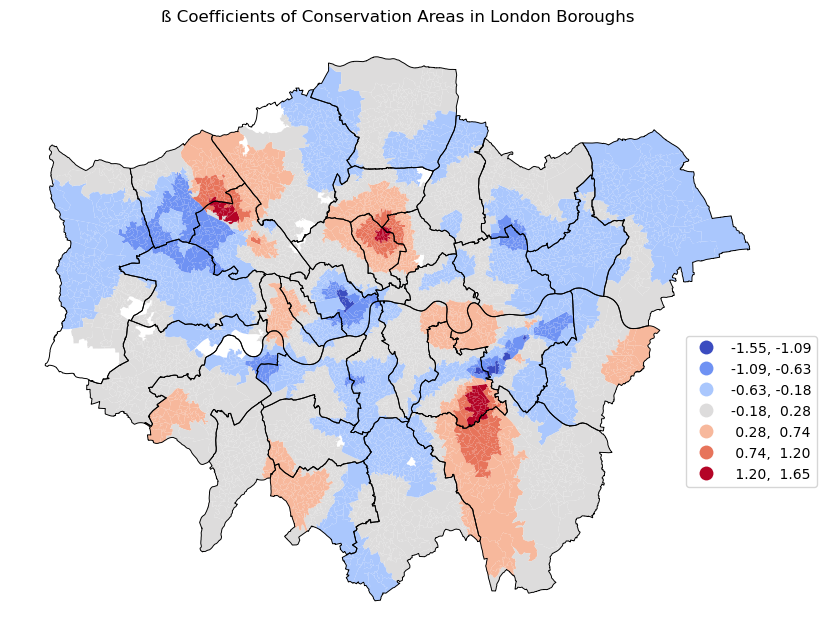

In [140]:
fig, ax = plt.subplots(figsize=(10, 10))

uhi_stat_gdb.plot(ax = ax,column = 'Conservation_Coefficient', cmap = 'coolwarm', scheme = 'equalinterval', k = 7,legend = True)
lonboroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)
ax.set_title('ß Coefficients of Conservation Areas in London Boroughs')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.05, 0.5))
ax.set_axis_off()
plt.savefig('betacoefficientconservation.png', bbox_inches='tight')
plt.show()

#mapping the coefficients to target policy suggestions